# Importing Necessary Libraries

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Creating The Model

In [2]:
class Discriminator(nn.Module):
    def __init__(self,img_dim):
        super(Discriminator,self).__init__()
        self.disc = nn.Sequential(
            nn.Linear(img_dim,256),
            nn.LeakyReLU(0.1),
            nn.Linear(256,64),
            nn.LeakyReLU(0.1),
            nn.Linear(64,1),
            nn.Sigmoid()
            )
    def forward(self,x):
        return self.disc(x)
    
class Generator(nn.Module):
    def __init__(self,noise_dim,img_dim):
        super(Generator,self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(noise_dim,128),
            nn.LeakyReLU(0.1),
            nn.Linear(128,256),
            nn.LeakyReLU(0.1),
            nn.Linear(256,512),
            nn.LeakyReLU(0.1),
            nn.Linear(512,img_dim),
            nn.Tanh()
            )
    def forward(self,x):
        return self.gen(x)

# Hyperparameters

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 3e-4
noise_dim = 64
img_dim = 28*28*1 #784
batch_size = 32
num_epochs = 40

# Initializations

In [4]:
disc = Discriminator(img_dim).to(device)
gen = Generator(noise_dim,img_dim).to(device)
fixed_noise = torch.randn((batch_size,noise_dim)).to(device) # to visualize how the generation is changing during training
transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])
dataset = datasets.MNIST(root="dataset/",transform=transforms,download=True)
dataloader = DataLoader(dataset,batch_size=batch_size,shuffle=True)
opt_disc = optim.Adam(disc.parameters(),lr=lr)
opt_gen = optim.Adam(gen.parameters(),lr=lr)
criterion = nn.BCELoss()

100%|██████████| 9912422/9912422 [00:00<00:00, 180382805.22it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 52303840.17it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45830653.19it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7833276.63it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



# Training Loop

Epoch 1/40: 100%|██████████| 1875/1875 [00:24<00:00, 75.82batch/s, D_loss=0.578, G_loss=1.31]


Epoch [1/40], Avg Discriminator Loss: 0.5783, Avg Generator Loss: 1.3107


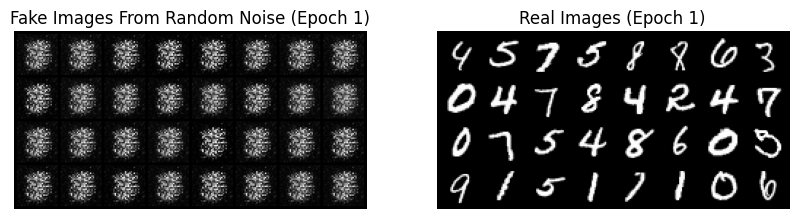

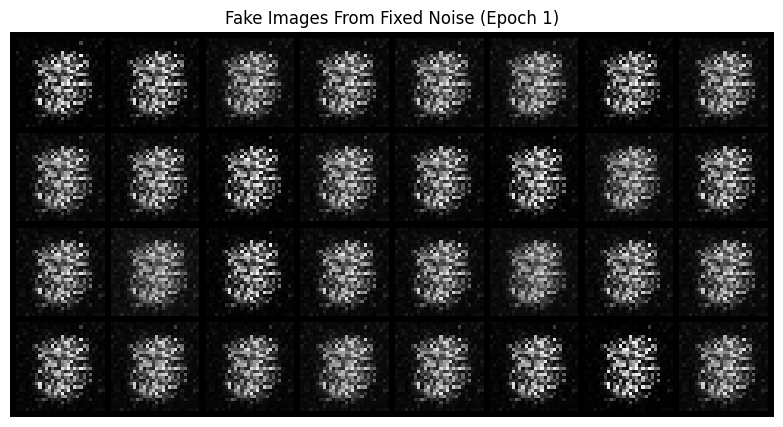

Epoch 2/40: 100%|██████████| 1875/1875 [00:24<00:00, 76.87batch/s, D_loss=0.656, G_loss=0.909]


Epoch [2/40], Avg Discriminator Loss: 0.6558, Avg Generator Loss: 0.9093


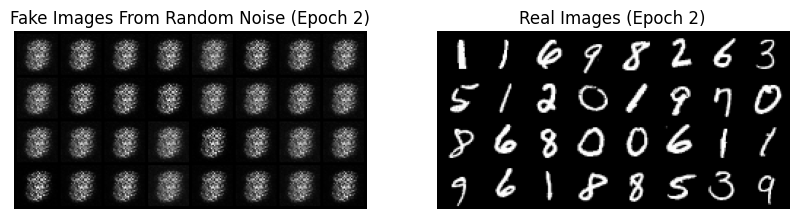

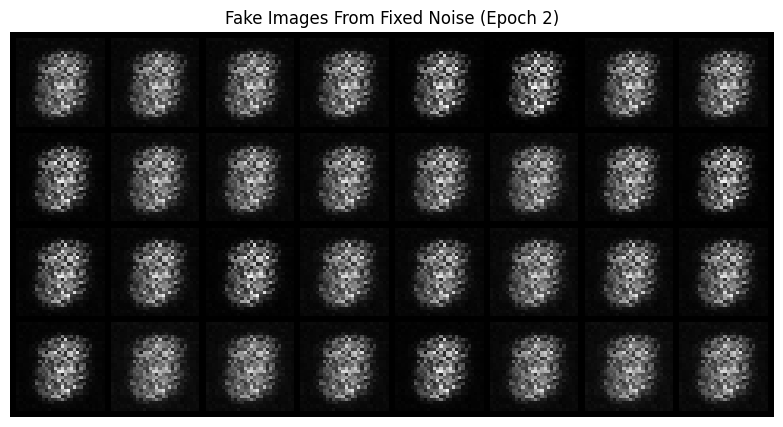

Epoch 3/40: 100%|██████████| 1875/1875 [00:24<00:00, 77.21batch/s, D_loss=0.603, G_loss=1.14]


Epoch [3/40], Avg Discriminator Loss: 0.6027, Avg Generator Loss: 1.1395


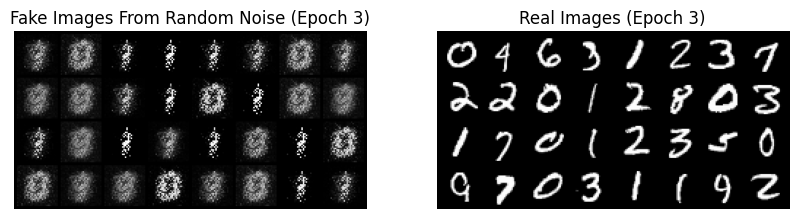

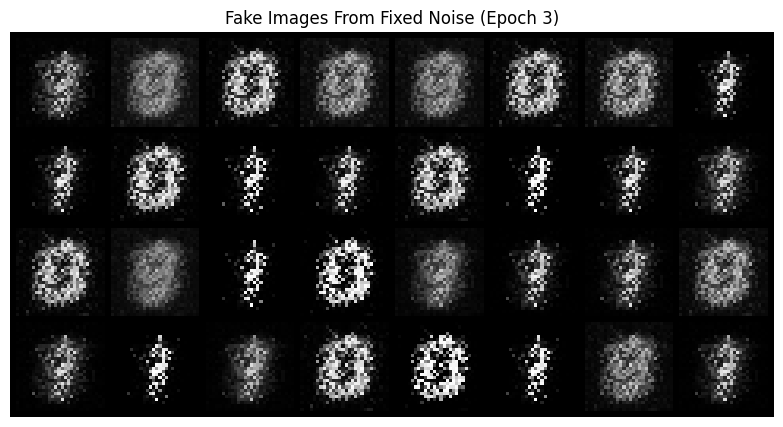

Epoch 4/40: 100%|██████████| 1875/1875 [00:24<00:00, 76.85batch/s, D_loss=0.641, G_loss=1.16]


Epoch [4/40], Avg Discriminator Loss: 0.6411, Avg Generator Loss: 1.1641


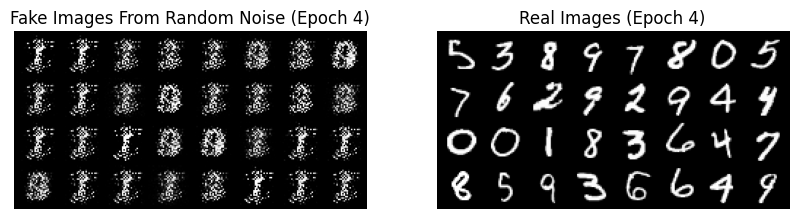

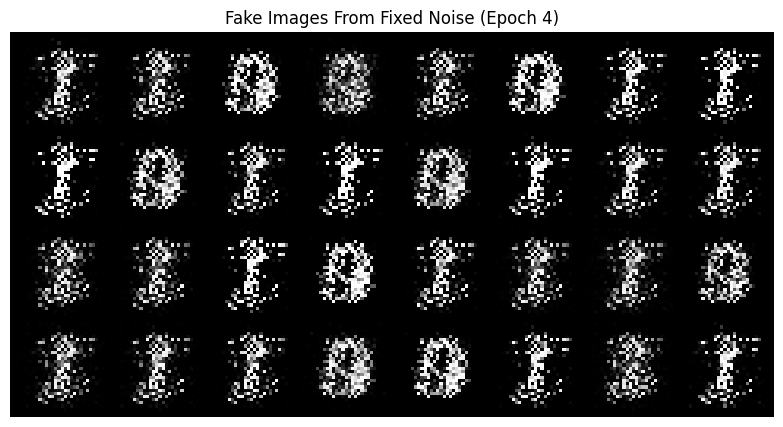

Epoch 5/40: 100%|██████████| 1875/1875 [00:24<00:00, 76.44batch/s, D_loss=0.46, G_loss=1.91] 


Epoch [5/40], Avg Discriminator Loss: 0.4605, Avg Generator Loss: 1.9100


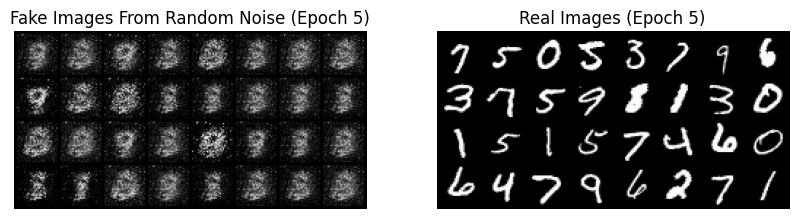

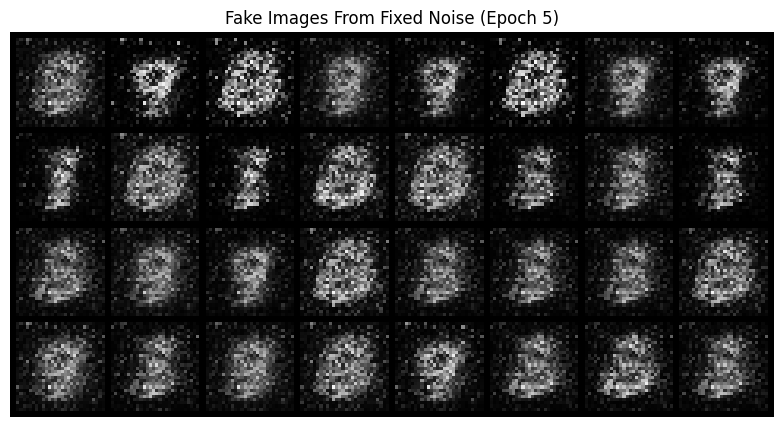

Epoch 6/40: 100%|██████████| 1875/1875 [00:24<00:00, 76.51batch/s, D_loss=0.518, G_loss=1.54]


Epoch [6/40], Avg Discriminator Loss: 0.5178, Avg Generator Loss: 1.5387


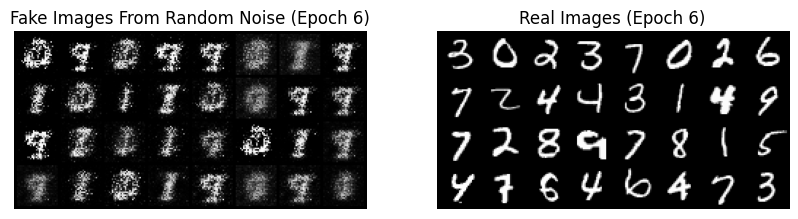

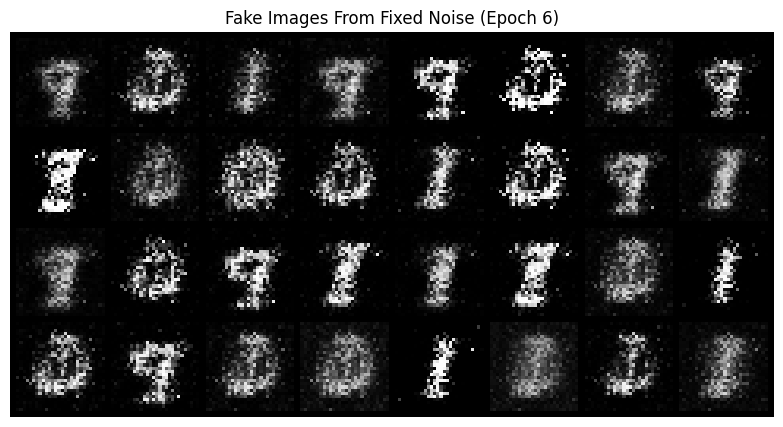

Epoch 7/40: 100%|██████████| 1875/1875 [00:24<00:00, 77.16batch/s, D_loss=0.494, G_loss=1.62]


Epoch [7/40], Avg Discriminator Loss: 0.4938, Avg Generator Loss: 1.6194


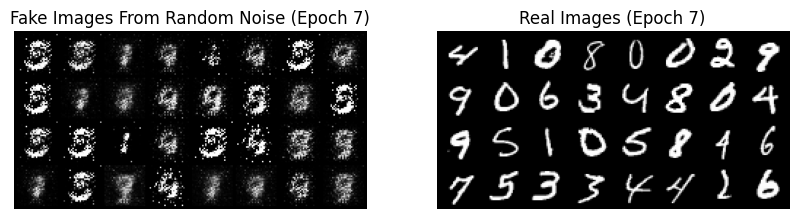

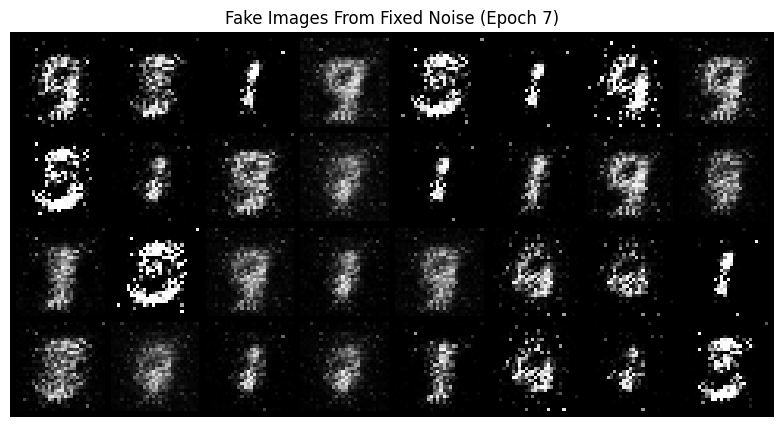

Epoch 8/40: 100%|██████████| 1875/1875 [00:24<00:00, 76.28batch/s, D_loss=0.478, G_loss=1.71]


Epoch [8/40], Avg Discriminator Loss: 0.4779, Avg Generator Loss: 1.7111


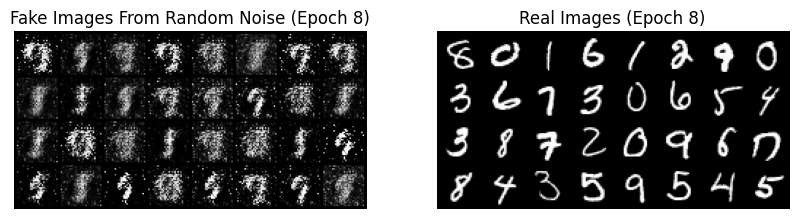

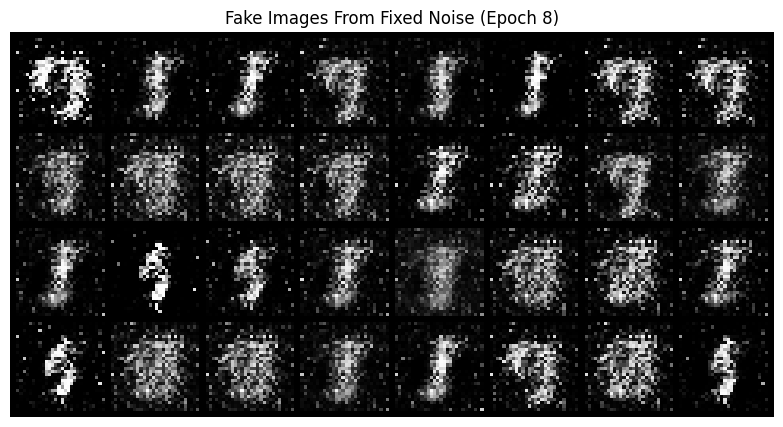

Epoch 9/40: 100%|██████████| 1875/1875 [00:24<00:00, 77.29batch/s, D_loss=0.463, G_loss=1.8] 


Epoch [9/40], Avg Discriminator Loss: 0.4627, Avg Generator Loss: 1.8049


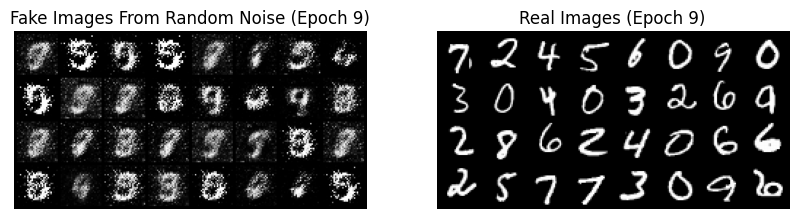

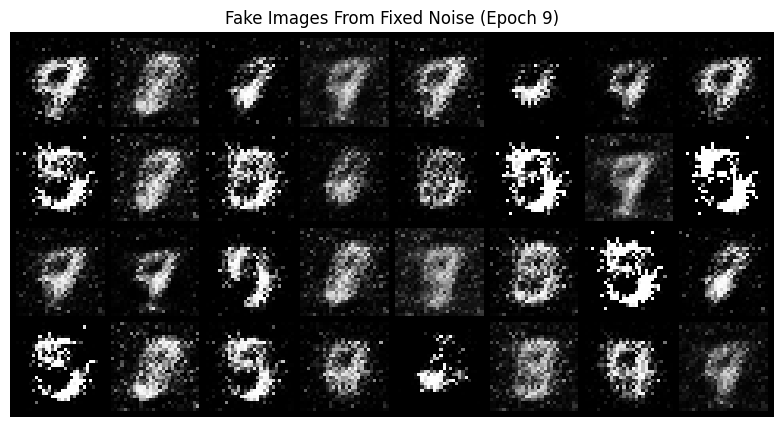

Epoch 10/40: 100%|██████████| 1875/1875 [00:24<00:00, 77.28batch/s, D_loss=0.507, G_loss=1.55]


Epoch [10/40], Avg Discriminator Loss: 0.5072, Avg Generator Loss: 1.5469


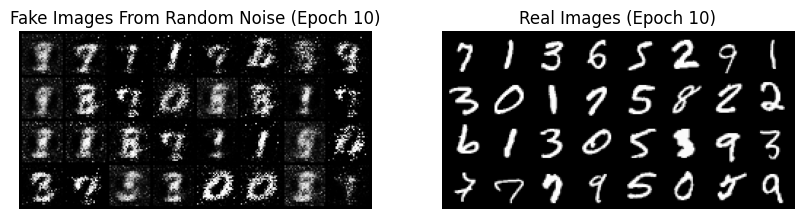

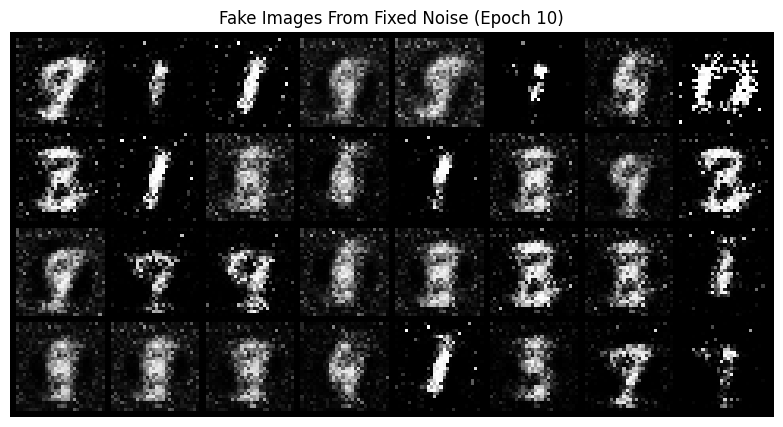

Epoch 11/40: 100%|██████████| 1875/1875 [00:24<00:00, 77.98batch/s, D_loss=0.484, G_loss=1.56]


Epoch [11/40], Avg Discriminator Loss: 0.4841, Avg Generator Loss: 1.5559


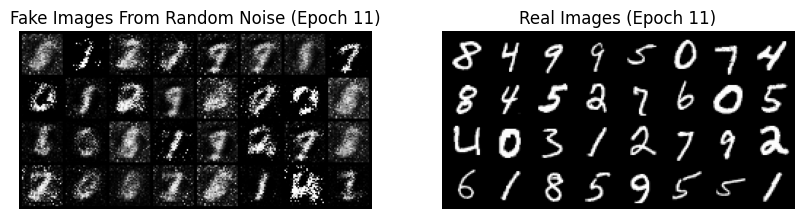

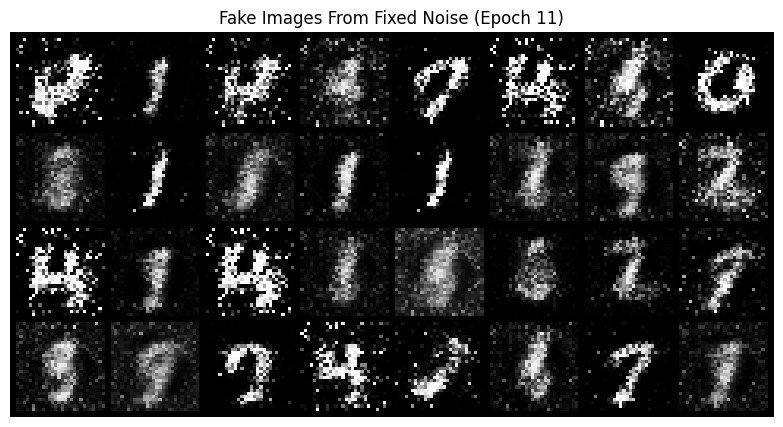

Epoch 12/40: 100%|██████████| 1875/1875 [00:23<00:00, 78.60batch/s, D_loss=0.435, G_loss=1.83]


Epoch [12/40], Avg Discriminator Loss: 0.4353, Avg Generator Loss: 1.8276


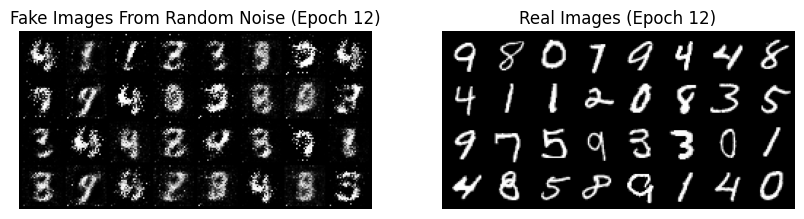

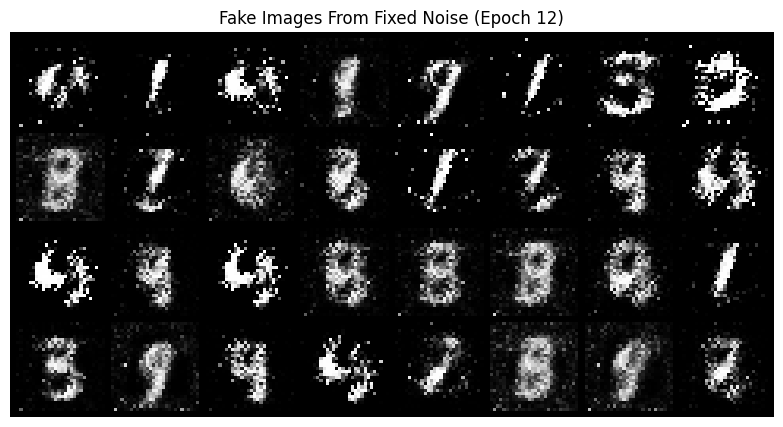

Epoch 13/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.37batch/s, D_loss=0.474, G_loss=1.65]


Epoch [13/40], Avg Discriminator Loss: 0.4742, Avg Generator Loss: 1.6540


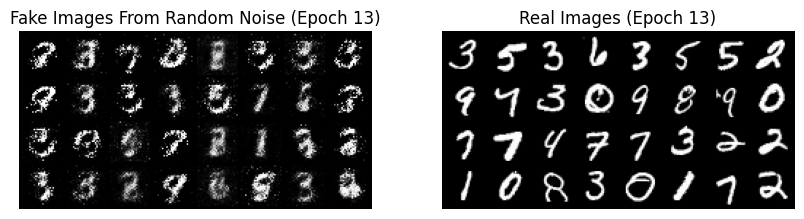

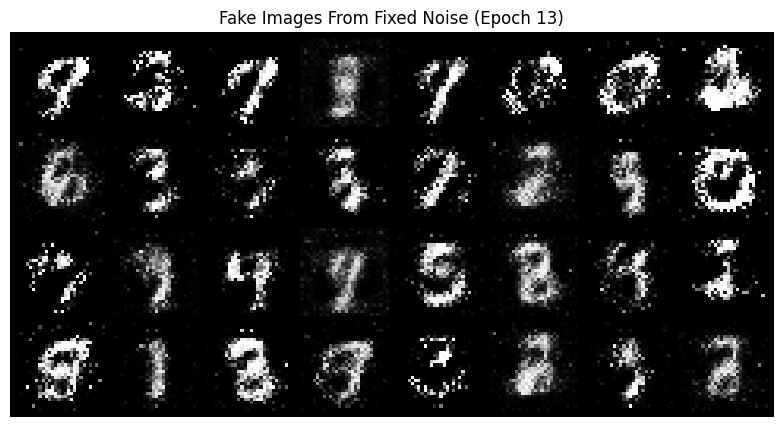

Epoch 14/40: 100%|██████████| 1875/1875 [00:22<00:00, 81.68batch/s, D_loss=0.494, G_loss=1.52]


Epoch [14/40], Avg Discriminator Loss: 0.4938, Avg Generator Loss: 1.5193


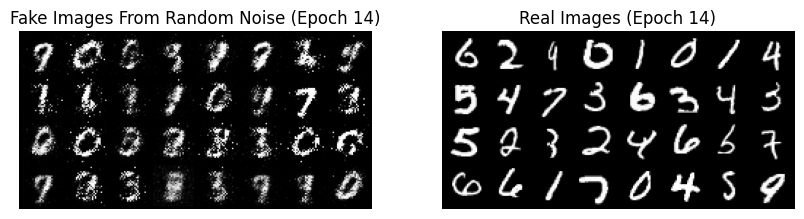

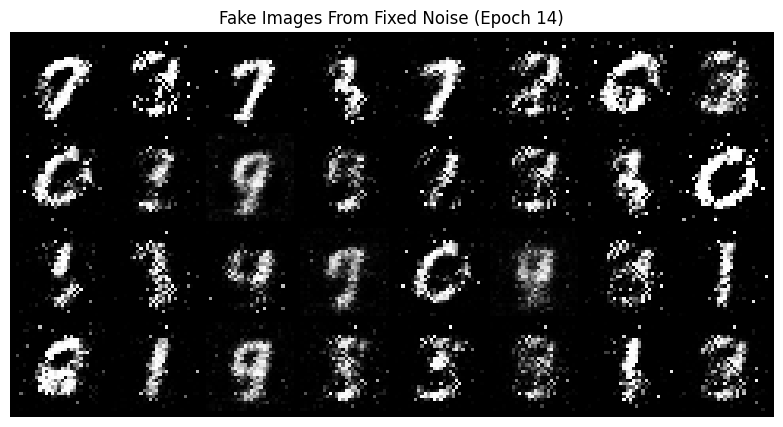

Epoch 15/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.34batch/s, D_loss=0.509, G_loss=1.41]


Epoch [15/40], Avg Discriminator Loss: 0.5087, Avg Generator Loss: 1.4074


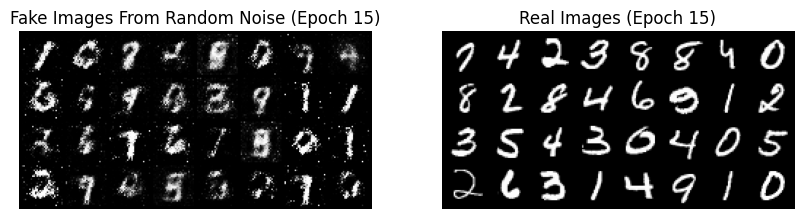

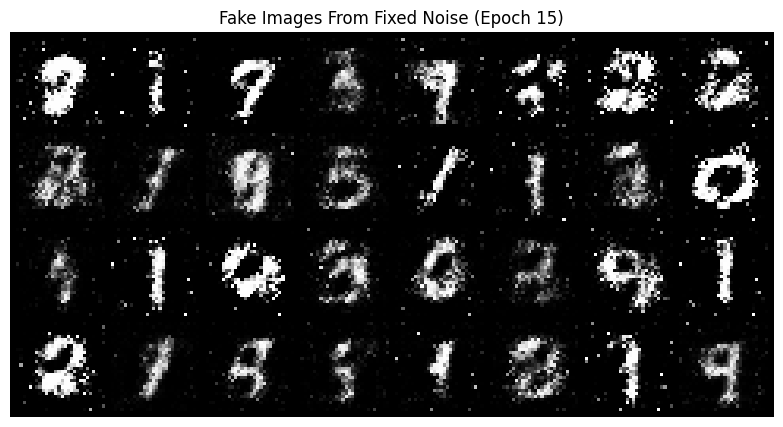

Epoch 16/40: 100%|██████████| 1875/1875 [00:23<00:00, 80.74batch/s, D_loss=0.52, G_loss=1.38] 


Epoch [16/40], Avg Discriminator Loss: 0.5198, Avg Generator Loss: 1.3825


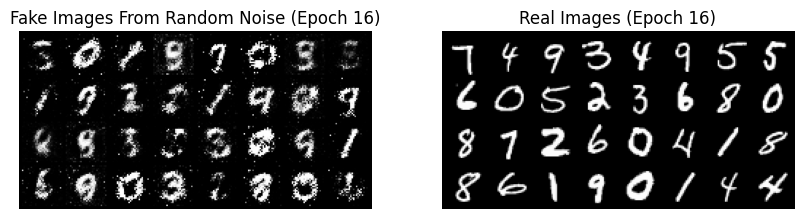

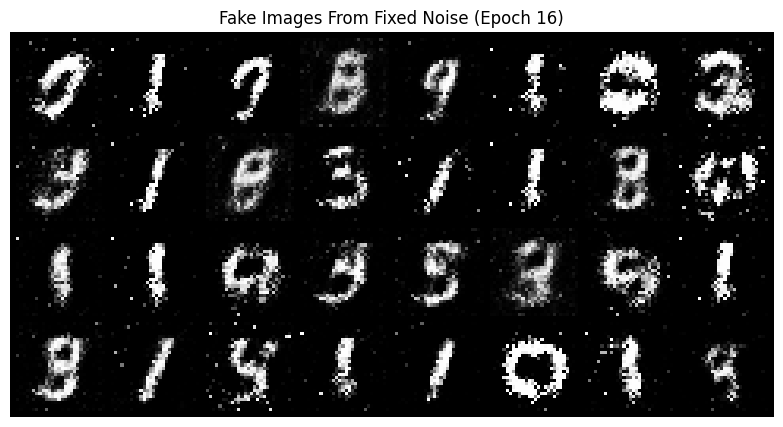

Epoch 17/40: 100%|██████████| 1875/1875 [00:22<00:00, 81.76batch/s, D_loss=0.539, G_loss=1.25]


Epoch [17/40], Avg Discriminator Loss: 0.5392, Avg Generator Loss: 1.2463


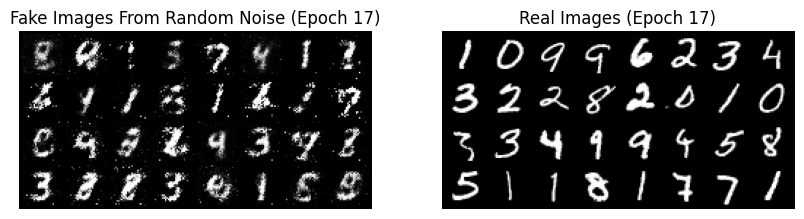

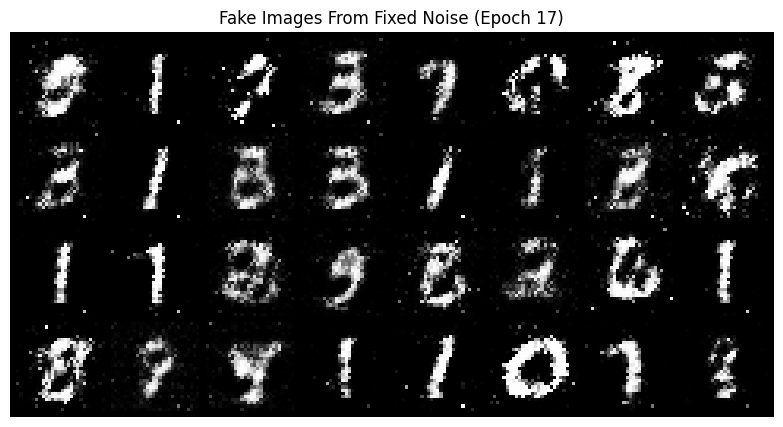

Epoch 18/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.33batch/s, D_loss=0.568, G_loss=1.18]


Epoch [18/40], Avg Discriminator Loss: 0.5678, Avg Generator Loss: 1.1769


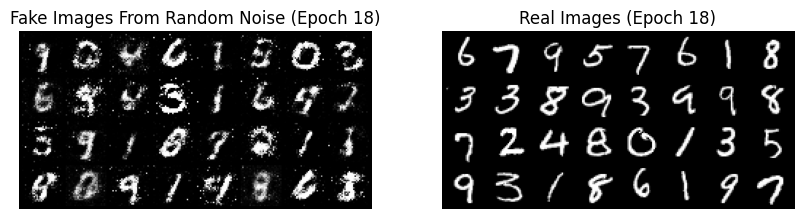

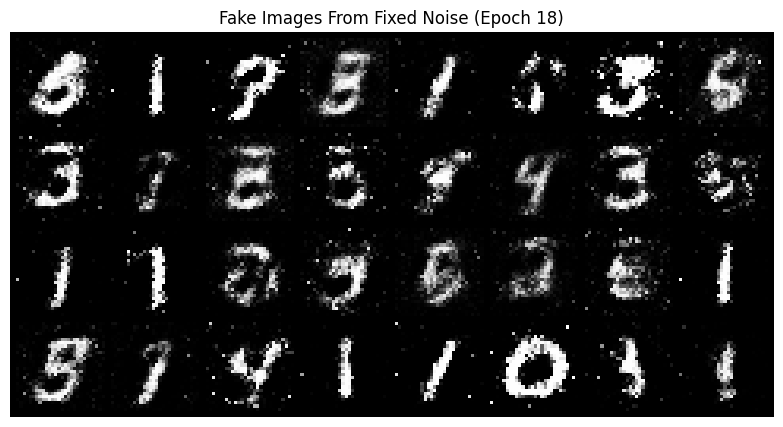

Epoch 19/40: 100%|██████████| 1875/1875 [00:23<00:00, 80.07batch/s, D_loss=0.553, G_loss=1.21]


Epoch [19/40], Avg Discriminator Loss: 0.5526, Avg Generator Loss: 1.2075


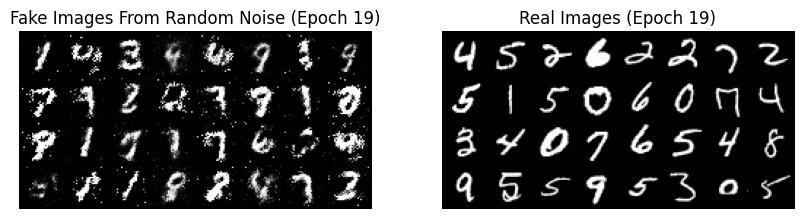

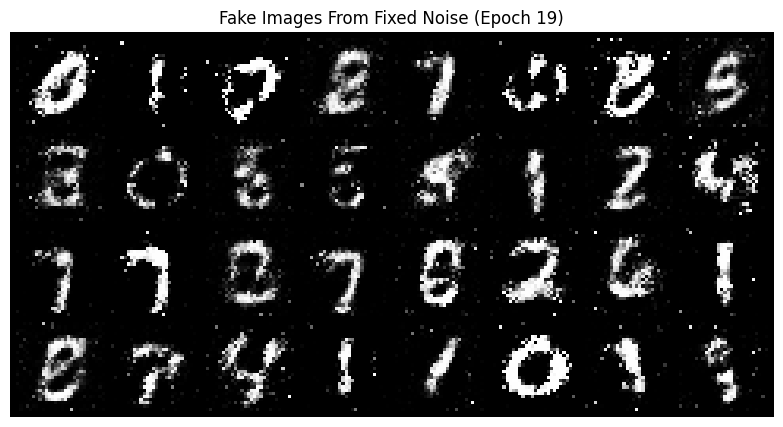

Epoch 20/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.07batch/s, D_loss=0.532, G_loss=1.26]


Epoch [20/40], Avg Discriminator Loss: 0.5319, Avg Generator Loss: 1.2636


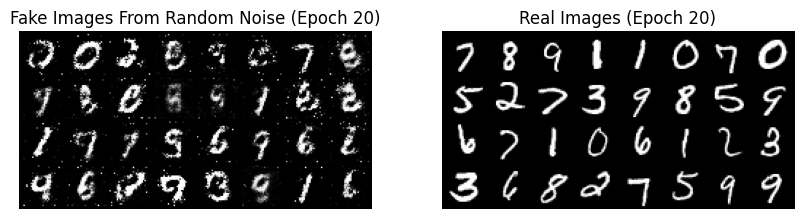

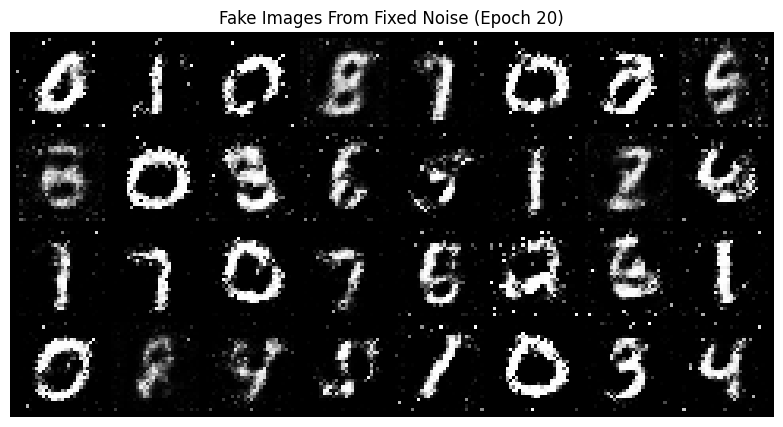

Epoch 21/40: 100%|██████████| 1875/1875 [00:22<00:00, 82.00batch/s, D_loss=0.542, G_loss=1.22]


Epoch [21/40], Avg Discriminator Loss: 0.5421, Avg Generator Loss: 1.2163


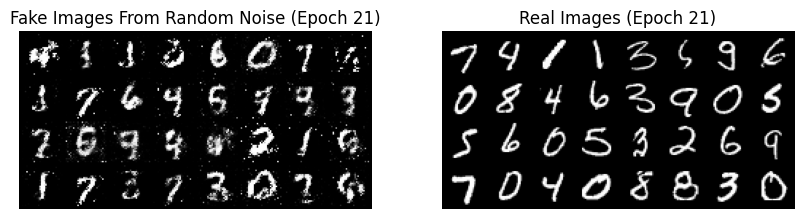

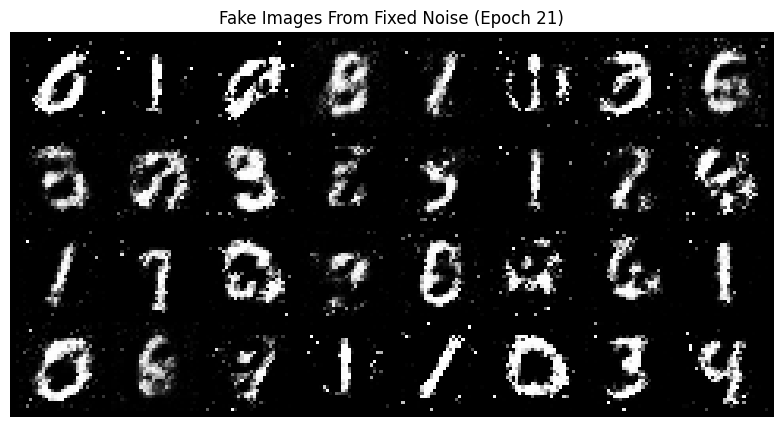

Epoch 22/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.36batch/s, D_loss=0.551, G_loss=1.18]


Epoch [22/40], Avg Discriminator Loss: 0.5507, Avg Generator Loss: 1.1840


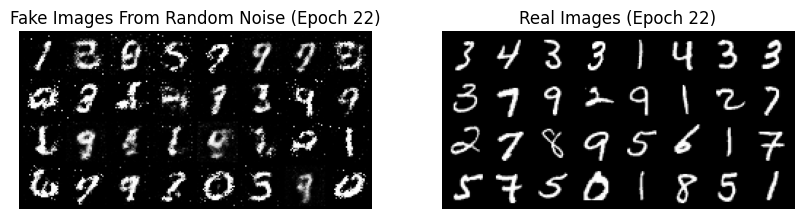

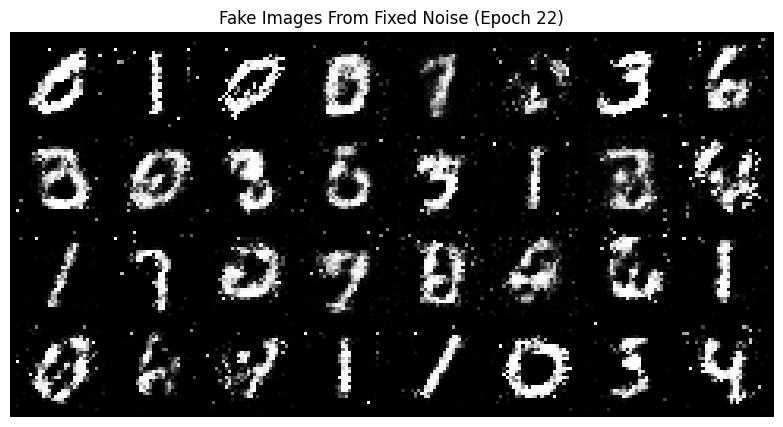

Epoch 23/40: 100%|██████████| 1875/1875 [00:22<00:00, 81.63batch/s, D_loss=0.557, G_loss=1.17]


Epoch [23/40], Avg Discriminator Loss: 0.5567, Avg Generator Loss: 1.1683


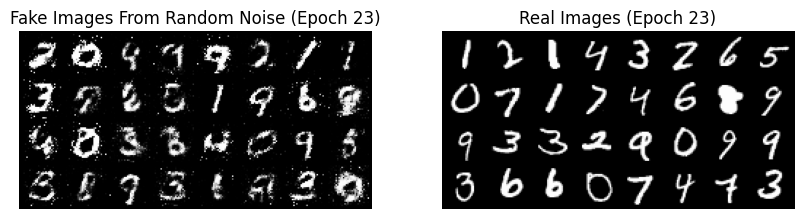

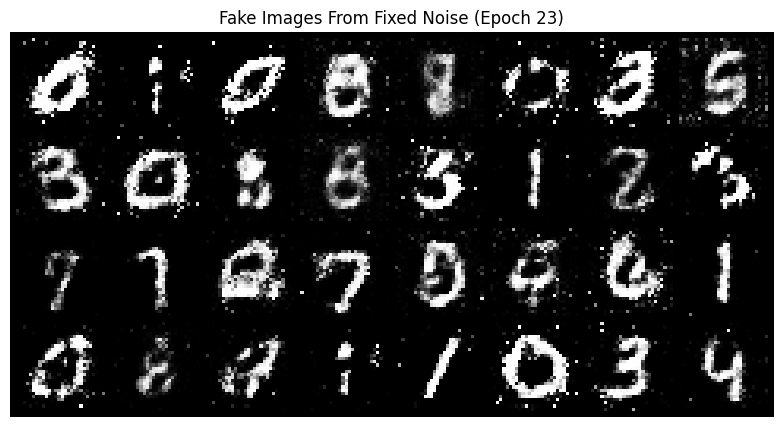

Epoch 24/40: 100%|██████████| 1875/1875 [00:22<00:00, 82.30batch/s, D_loss=0.561, G_loss=1.15]


Epoch [24/40], Avg Discriminator Loss: 0.5610, Avg Generator Loss: 1.1510


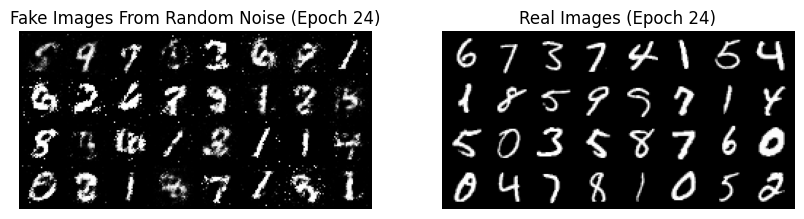

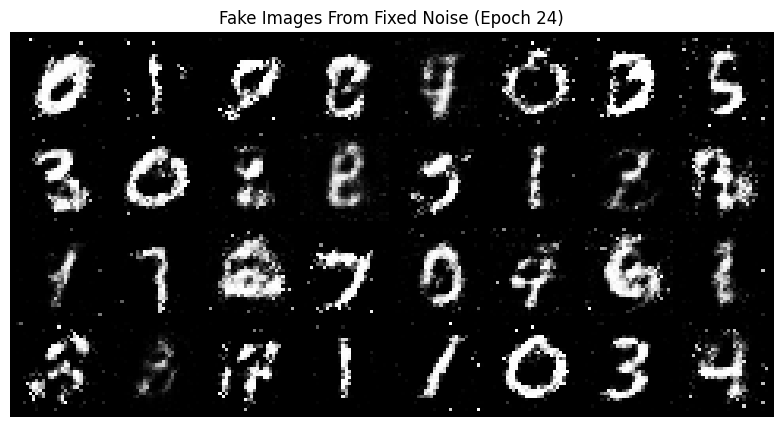

Epoch 25/40: 100%|██████████| 1875/1875 [00:22<00:00, 81.82batch/s, D_loss=0.561, G_loss=1.15]


Epoch [25/40], Avg Discriminator Loss: 0.5610, Avg Generator Loss: 1.1540


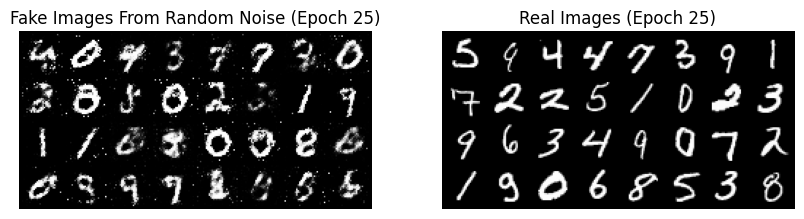

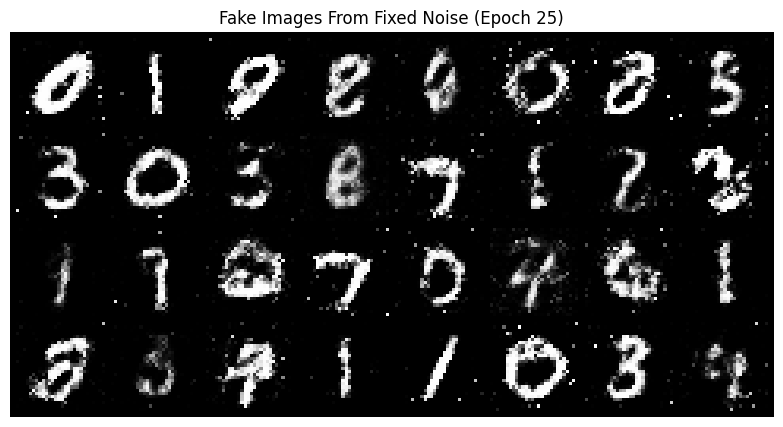

Epoch 26/40: 100%|██████████| 1875/1875 [00:22<00:00, 81.56batch/s, D_loss=0.572, G_loss=1.12]


Epoch [26/40], Avg Discriminator Loss: 0.5724, Avg Generator Loss: 1.1168


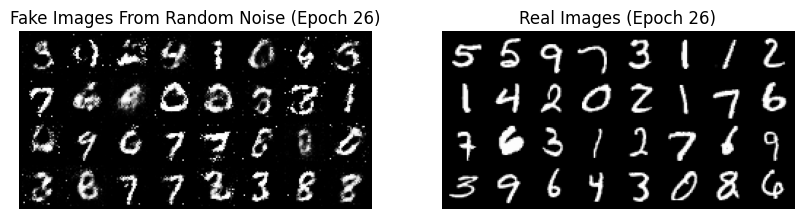

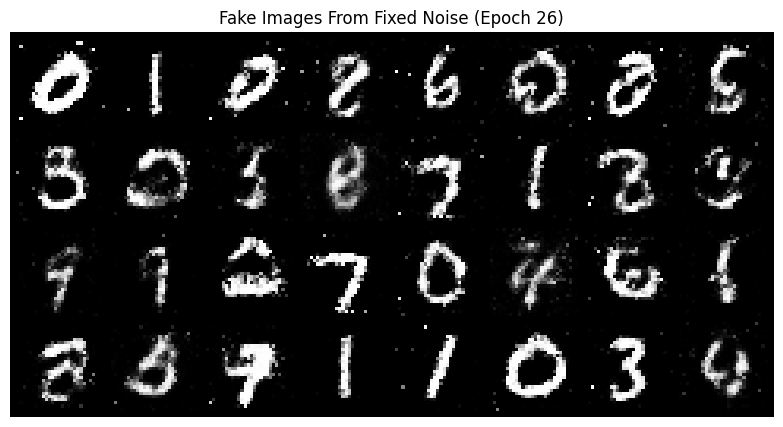

Epoch 27/40: 100%|██████████| 1875/1875 [00:22<00:00, 82.00batch/s, D_loss=0.584, G_loss=1.08]


Epoch [27/40], Avg Discriminator Loss: 0.5842, Avg Generator Loss: 1.0778


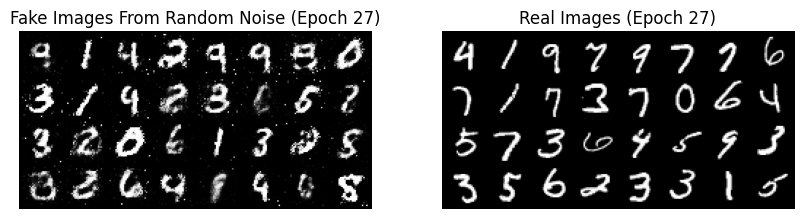

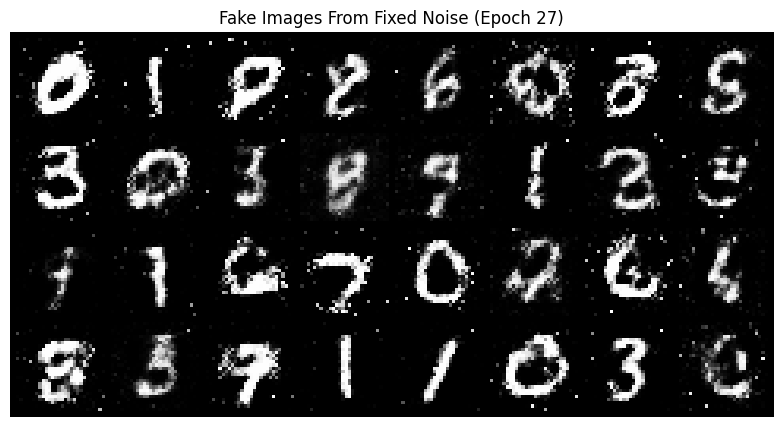

Epoch 28/40: 100%|██████████| 1875/1875 [00:23<00:00, 79.24batch/s, D_loss=0.598, G_loss=1.03]


Epoch [28/40], Avg Discriminator Loss: 0.5978, Avg Generator Loss: 1.0275


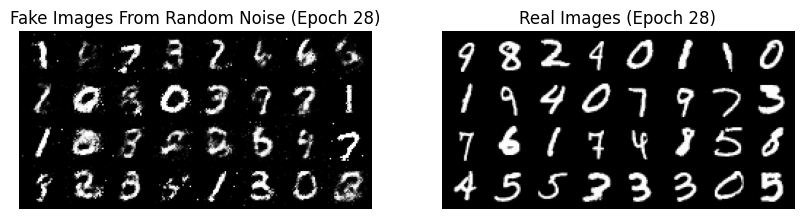

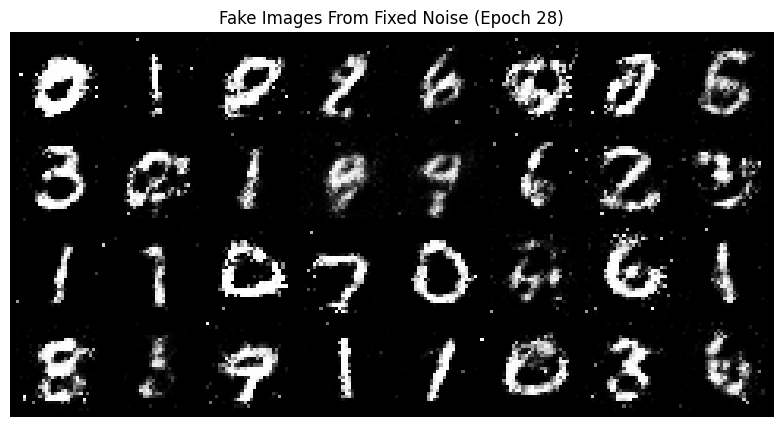

Epoch 29/40: 100%|██████████| 1875/1875 [00:23<00:00, 79.29batch/s, D_loss=0.608, G_loss=1]   


Epoch [29/40], Avg Discriminator Loss: 0.6075, Avg Generator Loss: 1.0040


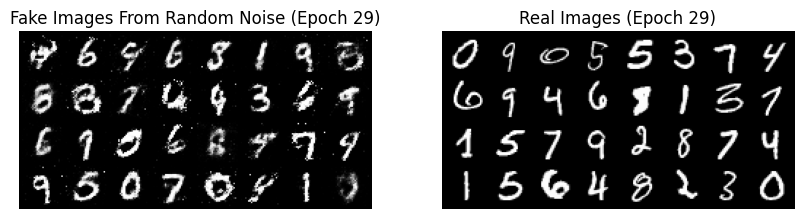

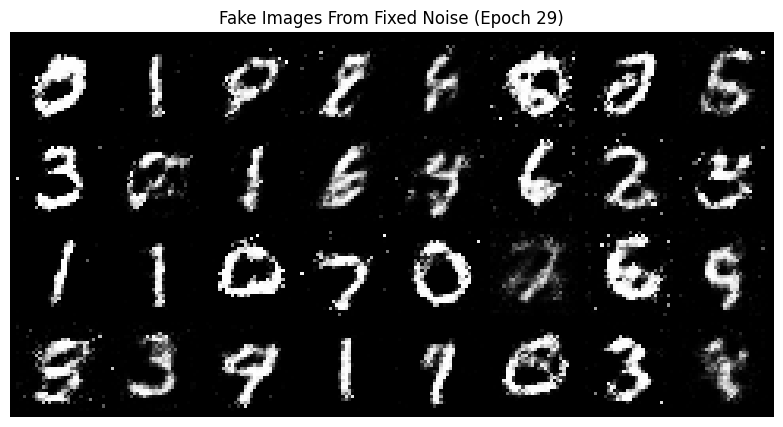

Epoch 30/40: 100%|██████████| 1875/1875 [00:23<00:00, 79.36batch/s, D_loss=0.612, G_loss=0.983]


Epoch [30/40], Avg Discriminator Loss: 0.6116, Avg Generator Loss: 0.9832


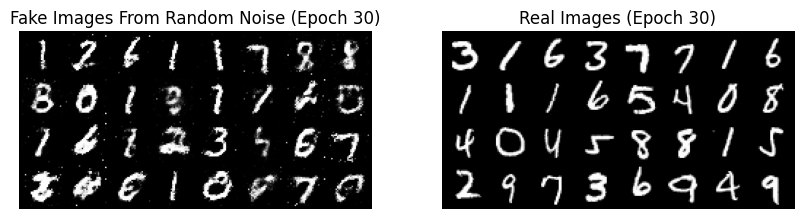

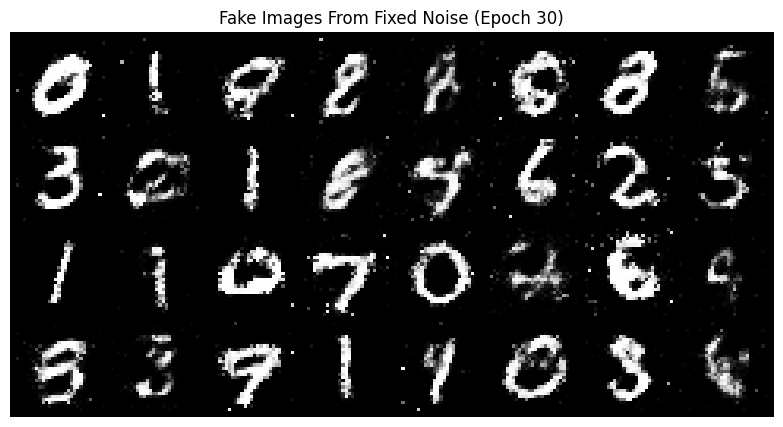

Epoch 31/40: 100%|██████████| 1875/1875 [00:23<00:00, 79.12batch/s, D_loss=0.616, G_loss=0.966]


Epoch [31/40], Avg Discriminator Loss: 0.6156, Avg Generator Loss: 0.9663


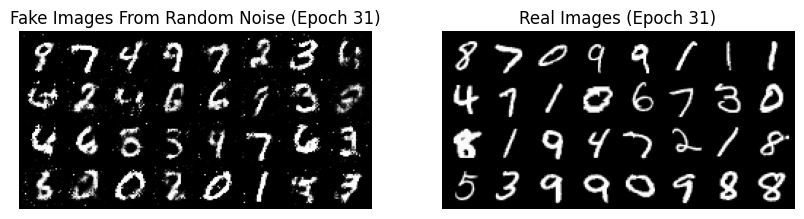

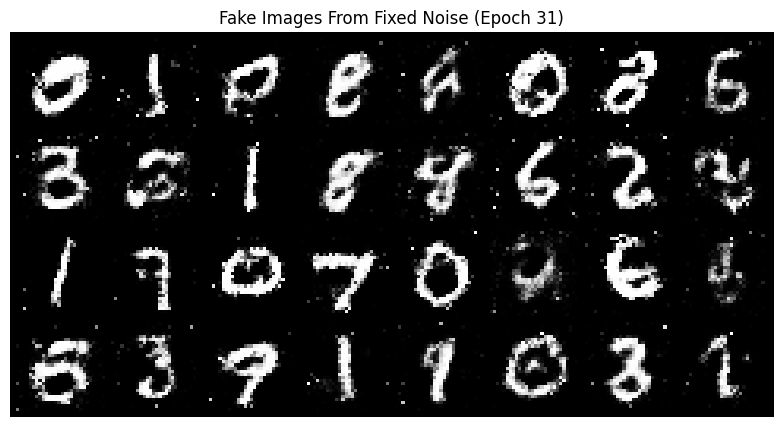

Epoch 32/40: 100%|██████████| 1875/1875 [00:23<00:00, 79.64batch/s, D_loss=0.612, G_loss=0.976]


Epoch [32/40], Avg Discriminator Loss: 0.6122, Avg Generator Loss: 0.9764


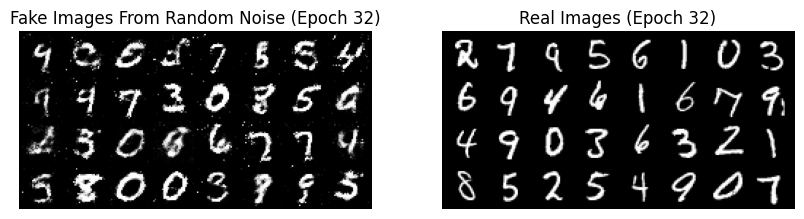

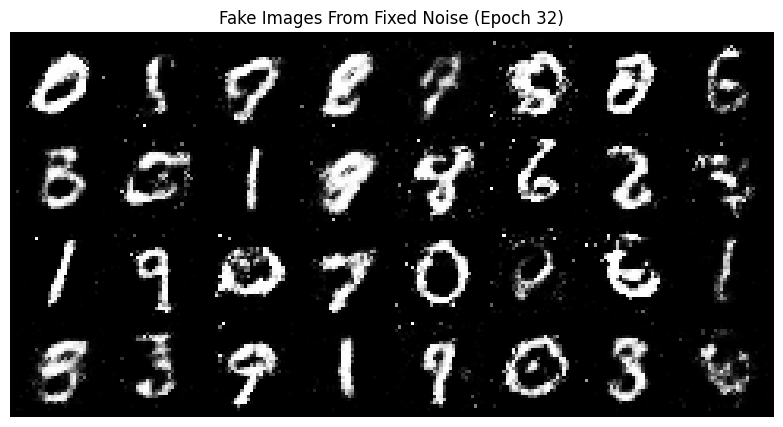

Epoch 33/40: 100%|██████████| 1875/1875 [00:22<00:00, 81.83batch/s, D_loss=0.616, G_loss=0.965]


Epoch [33/40], Avg Discriminator Loss: 0.6162, Avg Generator Loss: 0.9649


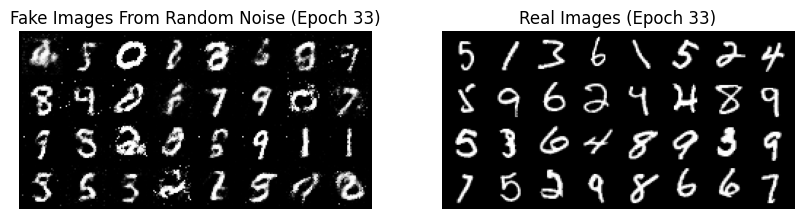

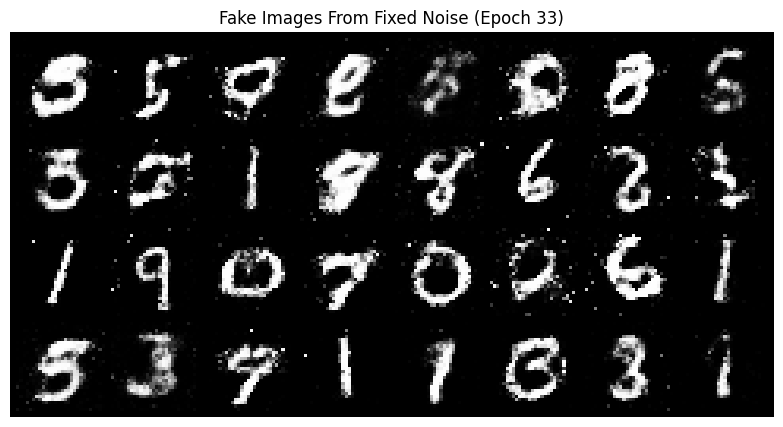

Epoch 34/40: 100%|██████████| 1875/1875 [00:23<00:00, 80.99batch/s, D_loss=0.617, G_loss=0.963]


Epoch [34/40], Avg Discriminator Loss: 0.6175, Avg Generator Loss: 0.9635


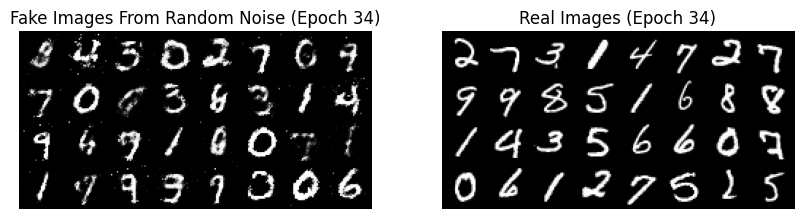

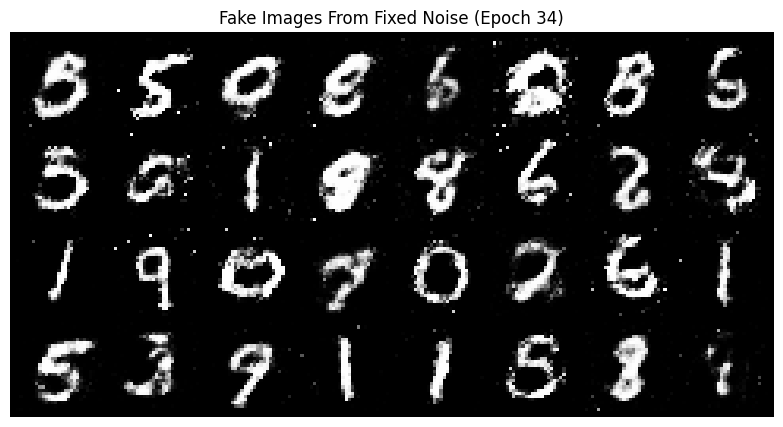

Epoch 35/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.39batch/s, D_loss=0.618, G_loss=0.954]


Epoch [35/40], Avg Discriminator Loss: 0.6181, Avg Generator Loss: 0.9542


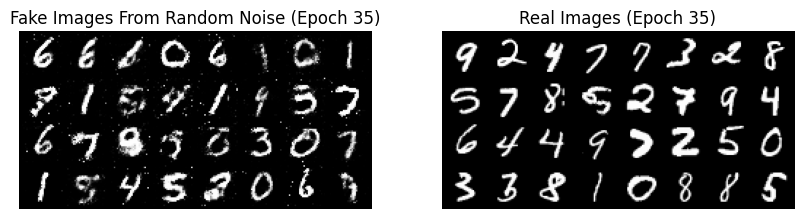

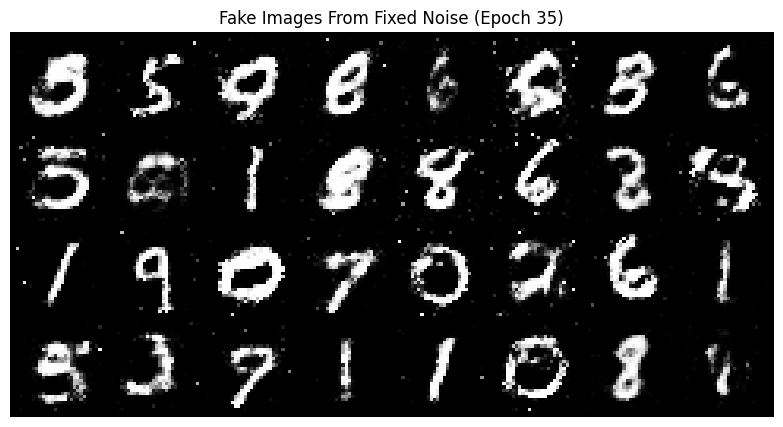

Epoch 36/40: 100%|██████████| 1875/1875 [00:23<00:00, 80.55batch/s, D_loss=0.618, G_loss=0.955]


Epoch [36/40], Avg Discriminator Loss: 0.6183, Avg Generator Loss: 0.9546


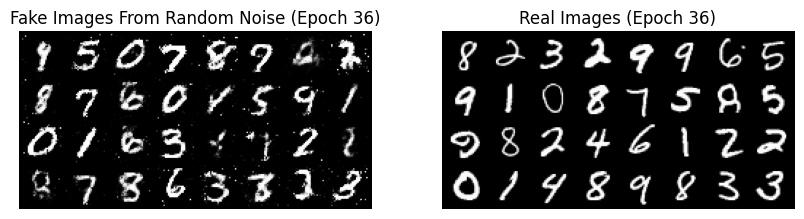

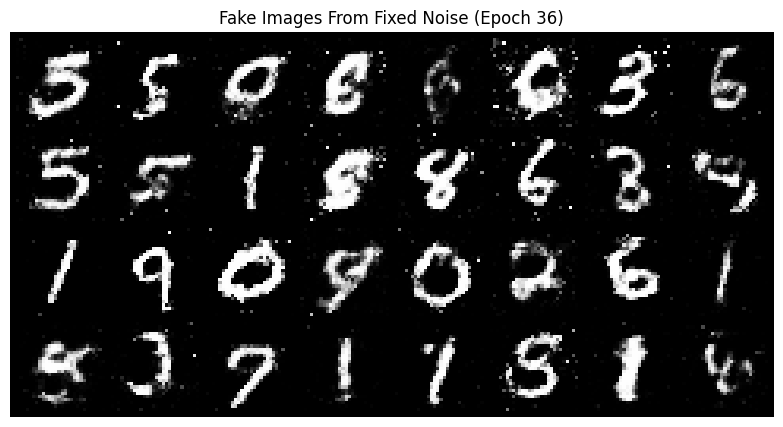

Epoch 37/40: 100%|██████████| 1875/1875 [00:22<00:00, 81.75batch/s, D_loss=0.621, G_loss=0.947]


Epoch [37/40], Avg Discriminator Loss: 0.6212, Avg Generator Loss: 0.9470


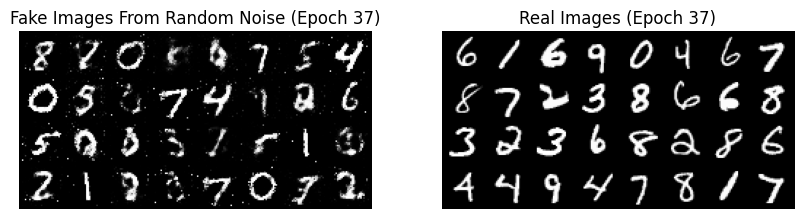

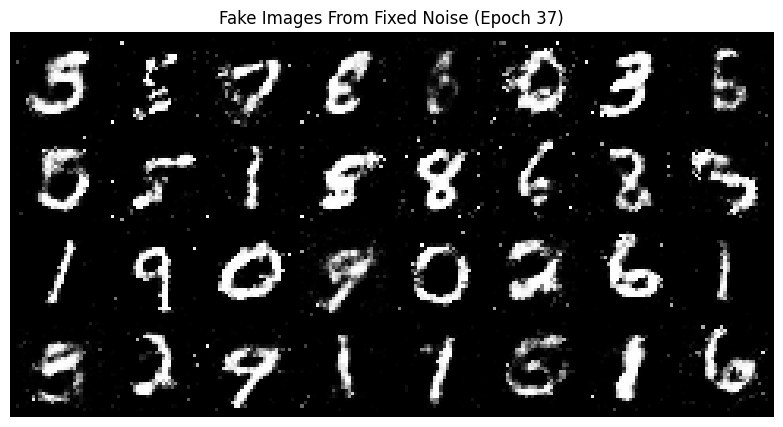

Epoch 38/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.03batch/s, D_loss=0.622, G_loss=0.945]


Epoch [38/40], Avg Discriminator Loss: 0.6219, Avg Generator Loss: 0.9446


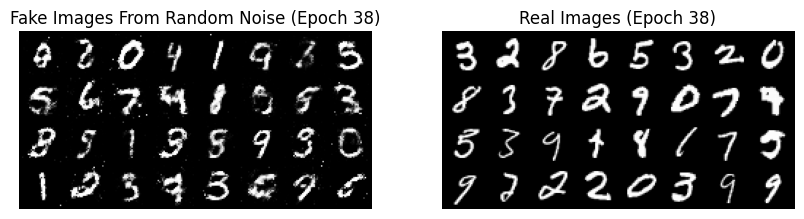

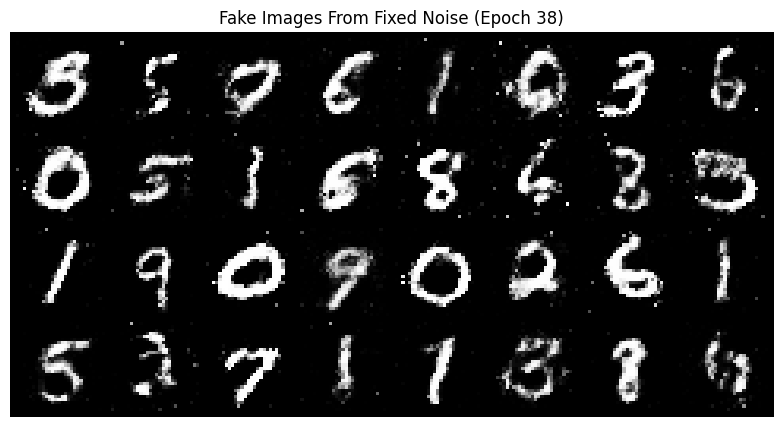

Epoch 39/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.07batch/s, D_loss=0.626, G_loss=0.935]


Epoch [39/40], Avg Discriminator Loss: 0.6259, Avg Generator Loss: 0.9355


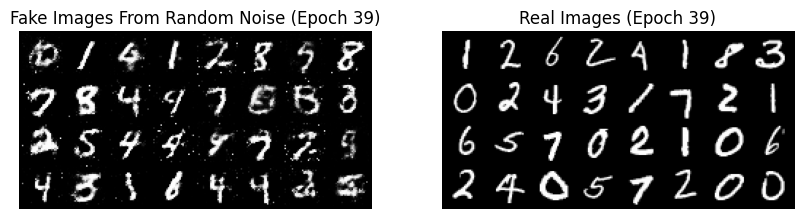

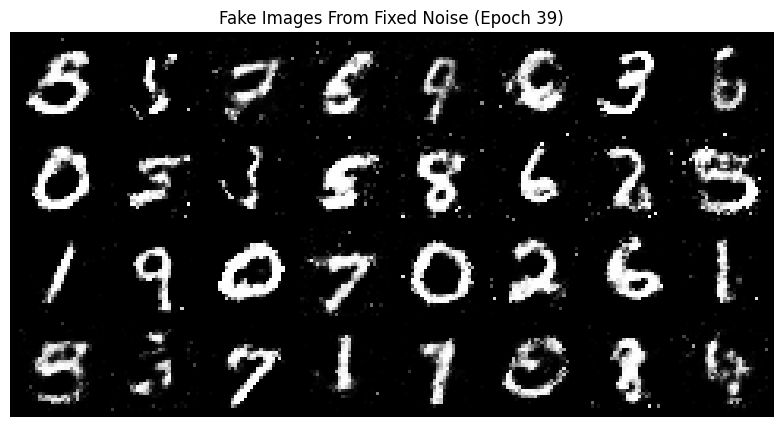

Epoch 40/40: 100%|██████████| 1875/1875 [00:23<00:00, 81.17batch/s, D_loss=0.629, G_loss=0.919]


Epoch [40/40], Avg Discriminator Loss: 0.6290, Avg Generator Loss: 0.9189


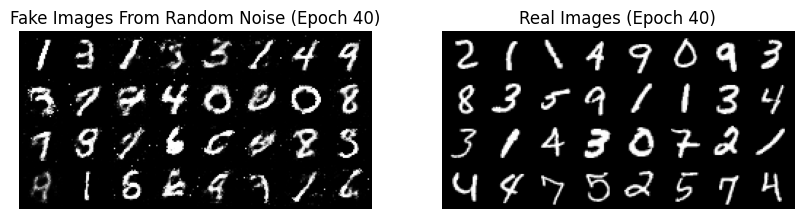

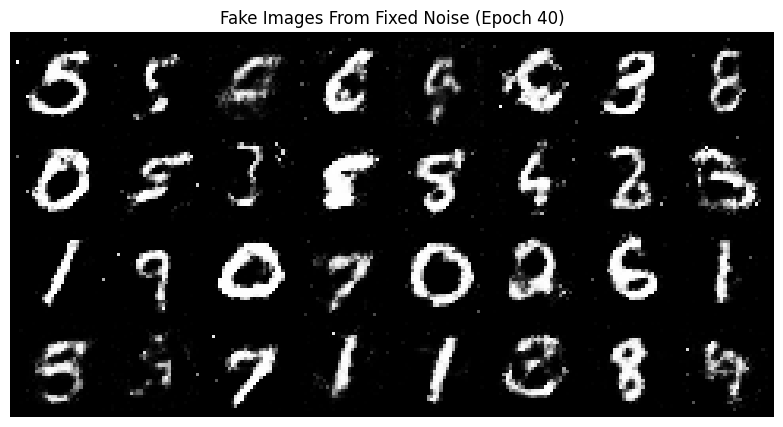

CPU times: user 15min 50s, sys: 44.3 s, total: 16min 34s
Wall time: 15min 58s


In [5]:
%%time
output_dir = "/kaggle/working/images"
# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
gen_loss = []
disc_loss = []
for epoch in range(num_epochs):
    total_lossD = 0.0
    total_lossG = 0.0
    
    # Create tqdm progress bar
    with tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as t:
        for batch_idx, (real_img, label) in t:
            real_img = real_img.view(-1, 784).to(device)  # batch,img_dim
            noise = torch.randn(batch_size, noise_dim).to(device)
            fake_img = gen(noise)
        
            #Train Discriminator : loss = max (log(D(real)) + log(1-D(G(noise)))) === min(-(log(D(real)) + log(1-D(G(noise)))))
            disc_real = disc(real_img).view(-1) #to flatten from [32,1] to [32]
            lossD_real = criterion(disc_real, torch.ones_like(disc_real))
            disc_fake = disc(fake_img).view(-1)
            lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
            lossD = (lossD_real + lossD_fake) / 2
            opt_disc.zero_grad()
            lossD.backward(retain_graph=True)#to use the fake_img , otherwise it will be cleared out during back propagation
            opt_disc.step()
            
            #Train Generator: loss = min log(1-D(G(z))) --->gives us weak gradients,not so good for training -> max(log(D(G(z)))) === min(-log(D(G(z))))
            output = disc(fake_img).view(-1)
            lossG = criterion(output, torch.ones_like(output))
            opt_gen.zero_grad()
            lossG.backward()
            opt_gen.step()
            
            # Accumulate losses
            total_lossD += lossD.item()
            total_lossG += lossG.item()
            
            # Update tqdm description with current losses
            t.set_postfix({'D_loss': total_lossD / (batch_idx + 1), 'G_loss': total_lossG / (batch_idx + 1)})
        
    # Compute average losses for the epoch
    avg_lossD = total_lossD / len(dataloader)
    avg_lossG = total_lossG / len(dataloader)
    disc_loss.append(avg_lossD)
    gen_loss.append(avg_lossG)

    # Print discriminator and generator average losses for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg Discriminator Loss: {avg_lossD:.4f}, Avg Generator Loss: {avg_lossG:.4f}")
    
    #Visualization With Tensorboard
    with torch.no_grad():
        fake_vid = gen(fixed_noise).reshape(-1,1,28,28)
        fake = fake_img.reshape(-1,1,28,28)
        data = real_img.reshape(-1,1,28,28)
        img_grid_fake_vid = torchvision.utils.make_grid(fake_vid,normalize=True)
        img_grid_fake = torchvision.utils.make_grid(fake,normalize=True)
        img_grid_real = torchvision.utils.make_grid(data,normalize=True)
        
        plt.figure(figsize=(10, 5))

        # Plotting the fake images
        plt.subplot(1, 2, 1)
        plt.imshow(torchvision.utils.make_grid(img_grid_fake.cpu(), normalize=True).permute(1, 2, 0))
        plt.title(f"Fake Images From Random Noise (Epoch {epoch+1})")
        plt.axis('off')

        # Plotting the real images
        plt.subplot(1, 2, 2)
        plt.imshow(torchvision.utils.make_grid(img_grid_real.cpu(), normalize=True).permute(1, 2, 0))
        plt.title(f"Real Images (Epoch {epoch+1})")
        plt.axis('off')
        
        # Storing the fake images generated from fixed noise
        plt.figure(figsize=(10, 5))
        plt.imshow(torchvision.utils.make_grid(img_grid_fake_vid.cpu(), normalize=True).permute(1, 2, 0))
        plt.title(f"Fake Images From Fixed Noise (Epoch {epoch+1})")
        plt.axis('off')
        # Save the image
        plt.savefig(os.path.join(output_dir, f"epoch_{epoch+1}.png"))
        
        plt.show()

# Plotting Losses

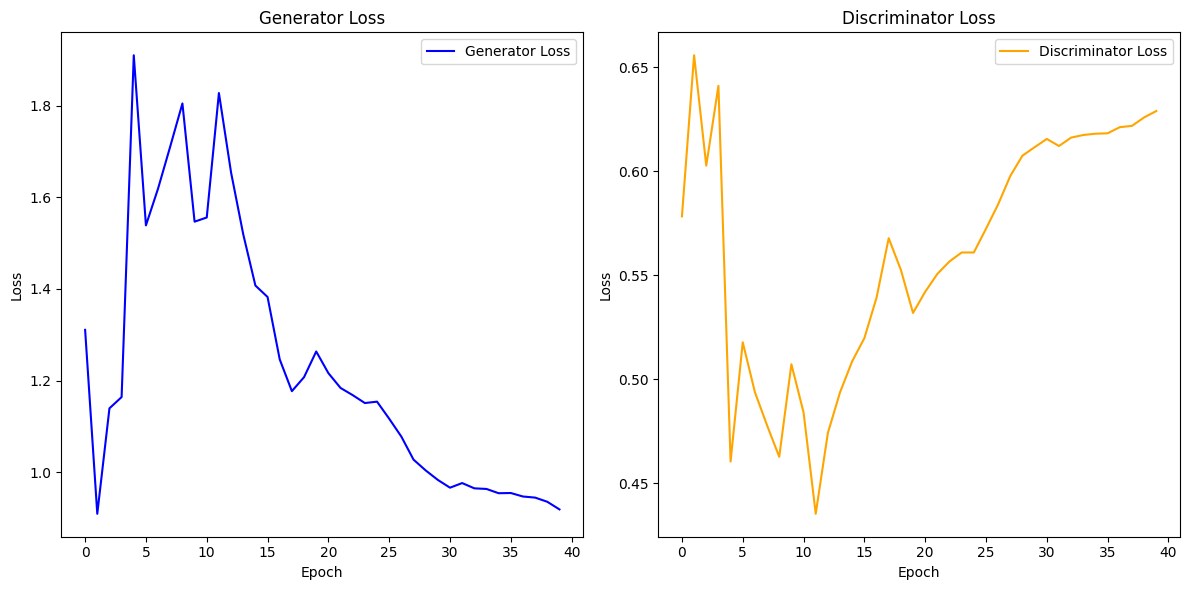

In [6]:
plt.figure(figsize=(12, 6))

# Plotting generator loss
plt.subplot(1, 2, 1)
plt.plot(gen_loss, label='Generator Loss', color='blue')
plt.title('Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting discriminator loss
plt.subplot(1, 2, 2)
plt.plot(disc_loss, label='Discriminator Loss', color='orange')
plt.title('Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Converting Generated Images from Fixed Noise to Video

In [14]:
# Convert images to video
import cv2
import glob

image_files = ['/kaggle/working/images/epoch_1.png',
 '/kaggle/working/images/epoch_2.png',
 '/kaggle/working/images/epoch_3.png',
 '/kaggle/working/images/epoch_4.png',
 '/kaggle/working/images/epoch_5.png',
 '/kaggle/working/images/epoch_6.png',
 '/kaggle/working/images/epoch_7.png',
 '/kaggle/working/images/epoch_8.png',
 '/kaggle/working/images/epoch_9.png',
 '/kaggle/working/images/epoch_10.png',
 '/kaggle/working/images/epoch_11.png',
 '/kaggle/working/images/epoch_12.png',
 '/kaggle/working/images/epoch_13.png',
 '/kaggle/working/images/epoch_14.png',
 '/kaggle/working/images/epoch_15.png',
 '/kaggle/working/images/epoch_16.png',
 '/kaggle/working/images/epoch_17.png',
 '/kaggle/working/images/epoch_18.png',
 '/kaggle/working/images/epoch_19.png',
 '/kaggle/working/images/epoch_20.png',
 '/kaggle/working/images/epoch_21.png',
 '/kaggle/working/images/epoch_22.png',
 '/kaggle/working/images/epoch_23.png',
 '/kaggle/working/images/epoch_24.png',
 '/kaggle/working/images/epoch_25.png',
 '/kaggle/working/images/epoch_26.png',
 '/kaggle/working/images/epoch_27.png',
 '/kaggle/working/images/epoch_28.png',
 '/kaggle/working/images/epoch_29.png',
 '/kaggle/working/images/epoch_30.png',
 '/kaggle/working/images/epoch_31.png',
 '/kaggle/working/images/epoch_32.png',
 '/kaggle/working/images/epoch_33.png',
 '/kaggle/working/images/epoch_34.png',
 '/kaggle/working/images/epoch_35.png',
 '/kaggle/working/images/epoch_36.png',
 '/kaggle/working/images/epoch_37.png',
 '/kaggle/working/images/epoch_38.png',
 '/kaggle/working/images/epoch_39.png',
 '/kaggle/working/images/epoch_40.png',]

frame = cv2.imread(image_files[0])
height, width, layers = frame.shape

video_name = 'generated_images.avi'
video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 2, (width, height)) #2->fps

for image_file in image_files:
    video.write(cv2.imread(image_file))

video.release()

print(f"Video saved as {video_name}")

Video saved as generated_images.avi
